<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

/home/zhiming/miniconda3/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [4]:
# A:

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [7]:
# This data set is very clean

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [5]:
# A:

In [3]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X[['PTRATIO', 'RM', 'B']], y, train_size=0.5, random_state=8)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6446233239803106

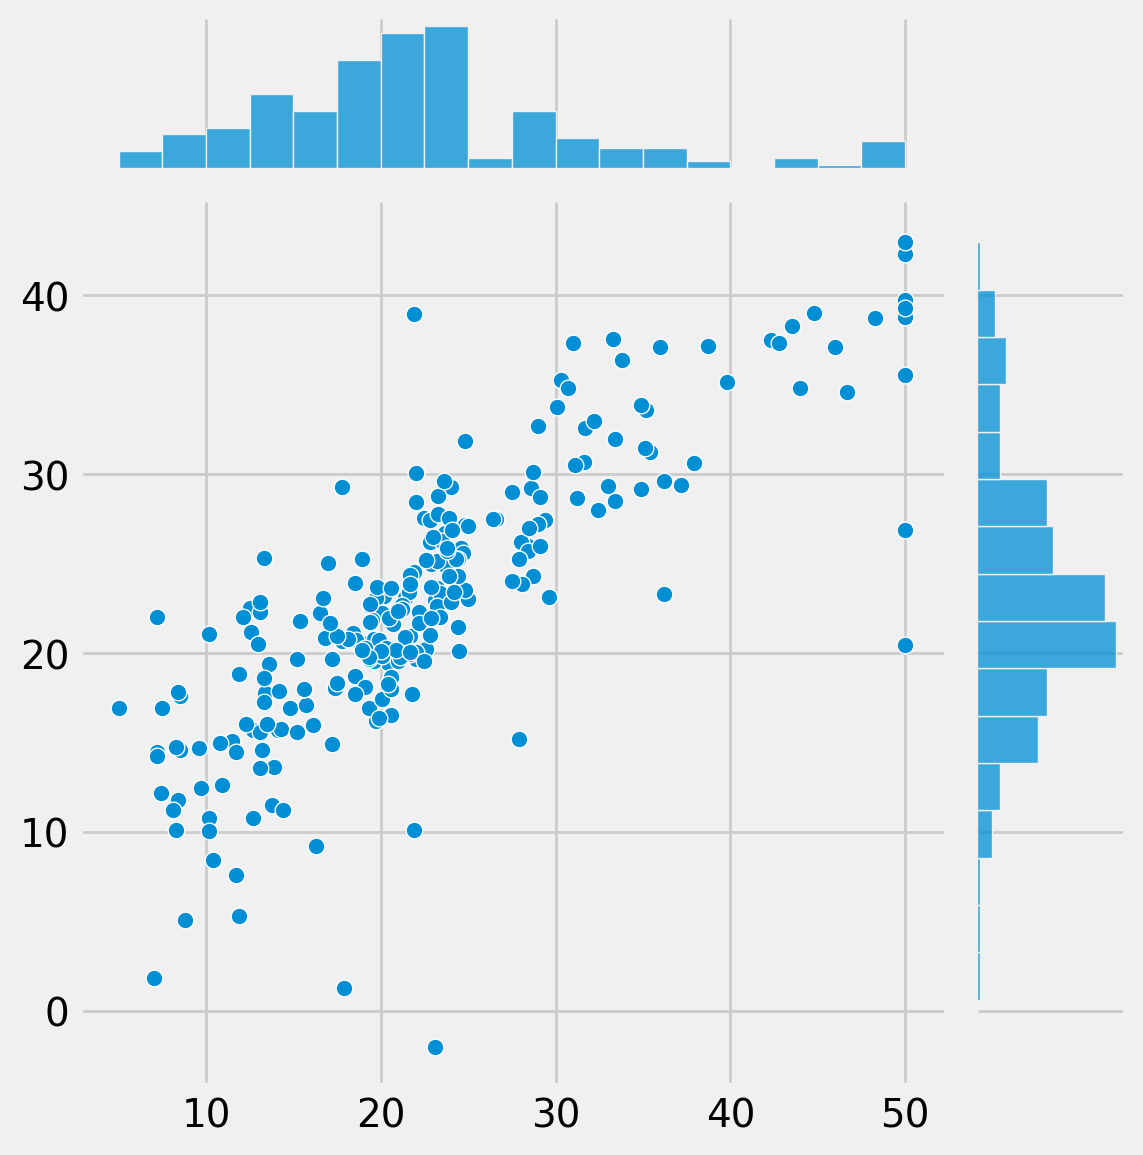

In [20]:
preds = lr.predict(X_test)
sns.jointplot(x=y_test, y=preds)

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

In [6]:
# A:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X[['PTRATIO', 'RM', 'B']], y, train_size=0.7, random_state=8)

In [22]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.6092331810176341

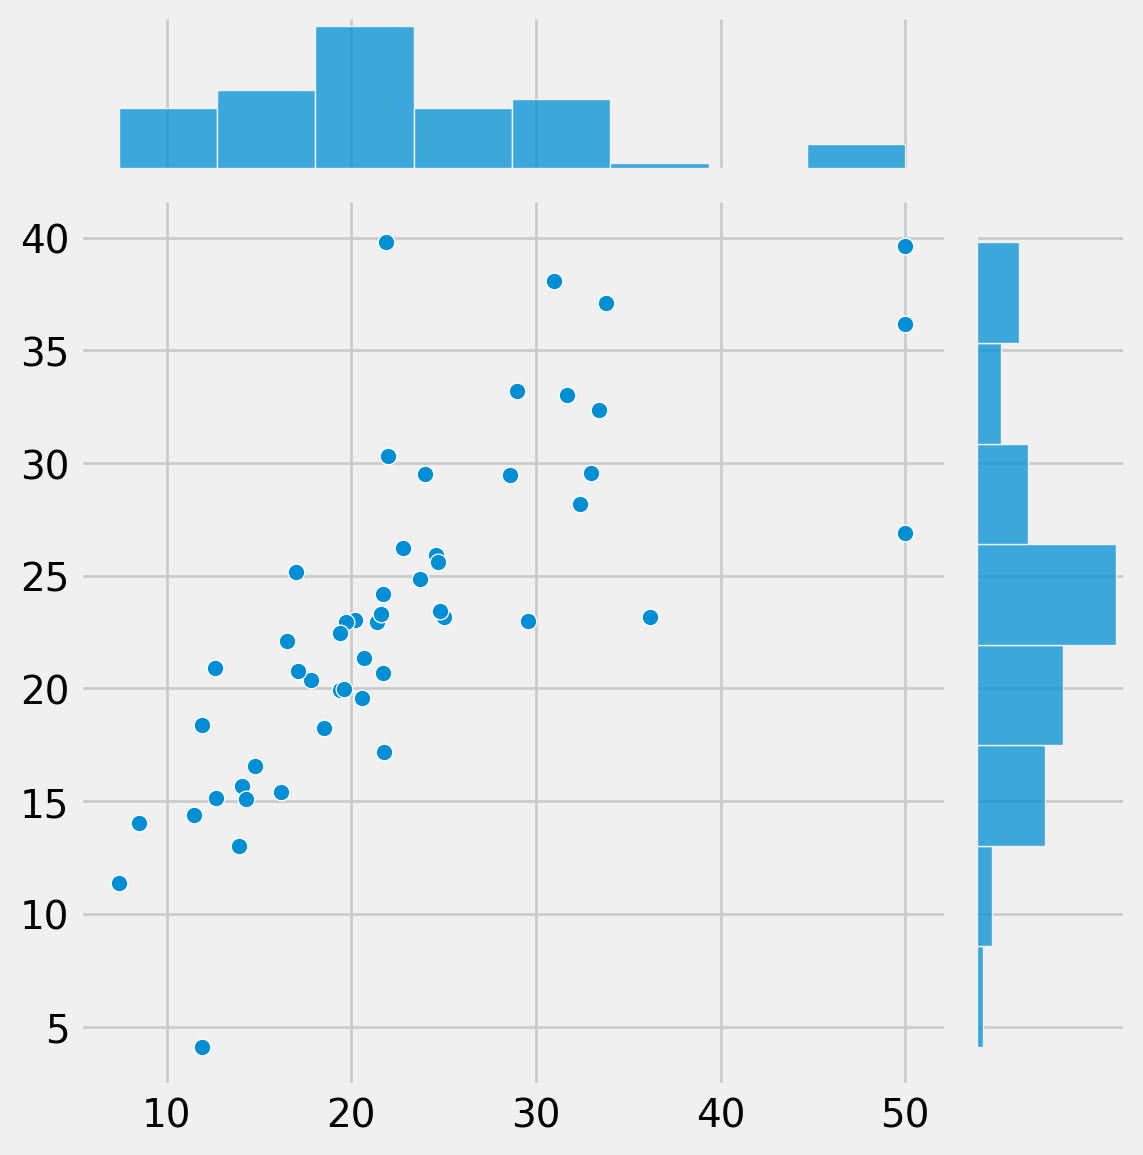

In [26]:
preds = lr2.predict(X_test)
sns.jointplot(x=y_test, y=preds)

Now, try the 90-10

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X[['PTRATIO', 'RM', 'B']], y, train_size=0.9, random_state=8)

In [25]:
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
lr3.score(X_test, y_test)

0.5689010811606822

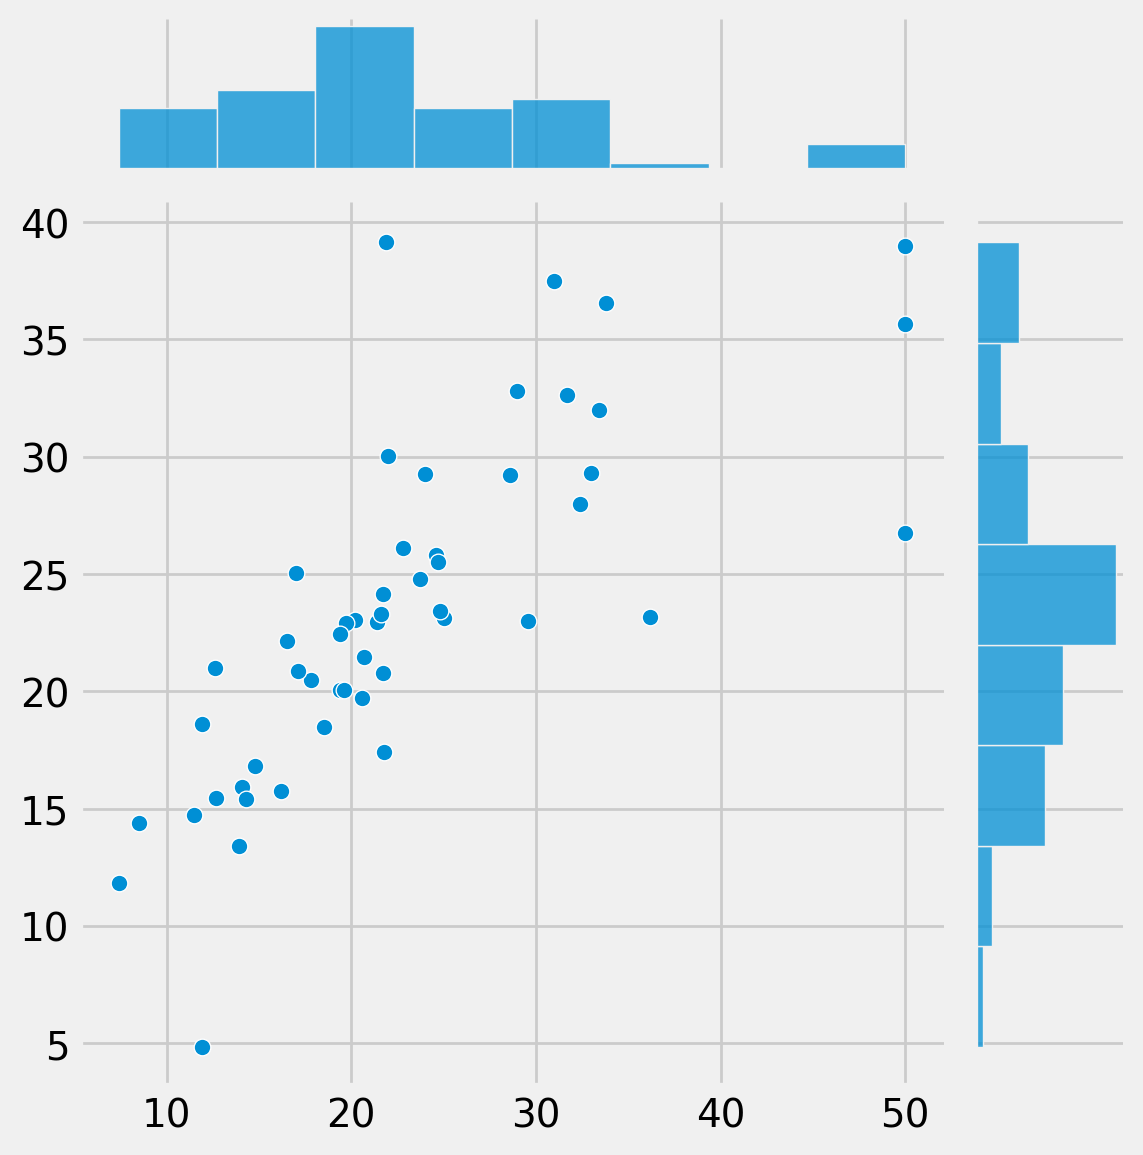

In [27]:
preds = lr3.predict(X_test)
sns.jointplot(x=y_test, y=preds)

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X[['PTRATIO', 'RM', 'B']], y, test_size=0.2, random_state=1)
for folds in range(5, 11):
    print("_________________ k = {} ________________".format(folds))
    model = LinearRegression()
    scores = cross_val_score(model, X_train, y_train, cv=folds)
    print("Scores: {}".format(scores))
    print("Mean score: {}".format(np.mean(scores)))
    print("Std dev of scores: {}".format(np.std(scores)))
    preds = cross_val_predict(model, X_train, y_train, cv=folds)
    r2_score = metrics.r2_score(y_train, preds)
    print("Cross val predicted r2: {}".format(r2_score))
    print("___________________________________________")
    

_________________ k = 5 ________________
Scores: [0.55732204 0.57778154 0.62546664 0.53040501 0.54652909]
Mean score: 0.5675008661331343
Std dev of scores: 0.03281843904908778
Cross val predicted r2: 0.5693094215770854
___________________________________________
_________________ k = 6 ________________
Scores: [0.52046589 0.45381442 0.72728793 0.41460254 0.60212981 0.57931227]
Mean score: 0.549602142717924
Std dev of scores: 0.10284550596745264
Cross val predicted r2: 0.5652634539470742
___________________________________________
_________________ k = 7 ________________
Scores: [0.57397804 0.37174516 0.73257352 0.64003823 0.35286978 0.49732806
 0.64913871]
Mean score: 0.5453816428031492
Std dev of scores: 0.13368595502948327
Cross val predicted r2: 0.5605506961117537
___________________________________________
_________________ k = 8 ________________
Scores: [0.77672371 0.13766647 0.74143208 0.67780774 0.67610881 0.36595324
 0.54780635 0.67369463]
Mean score: 0.5746491275254906
Std dev

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [8]:
# A:

### 5.1) Explain what could be wrong with this approach.

In [9]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

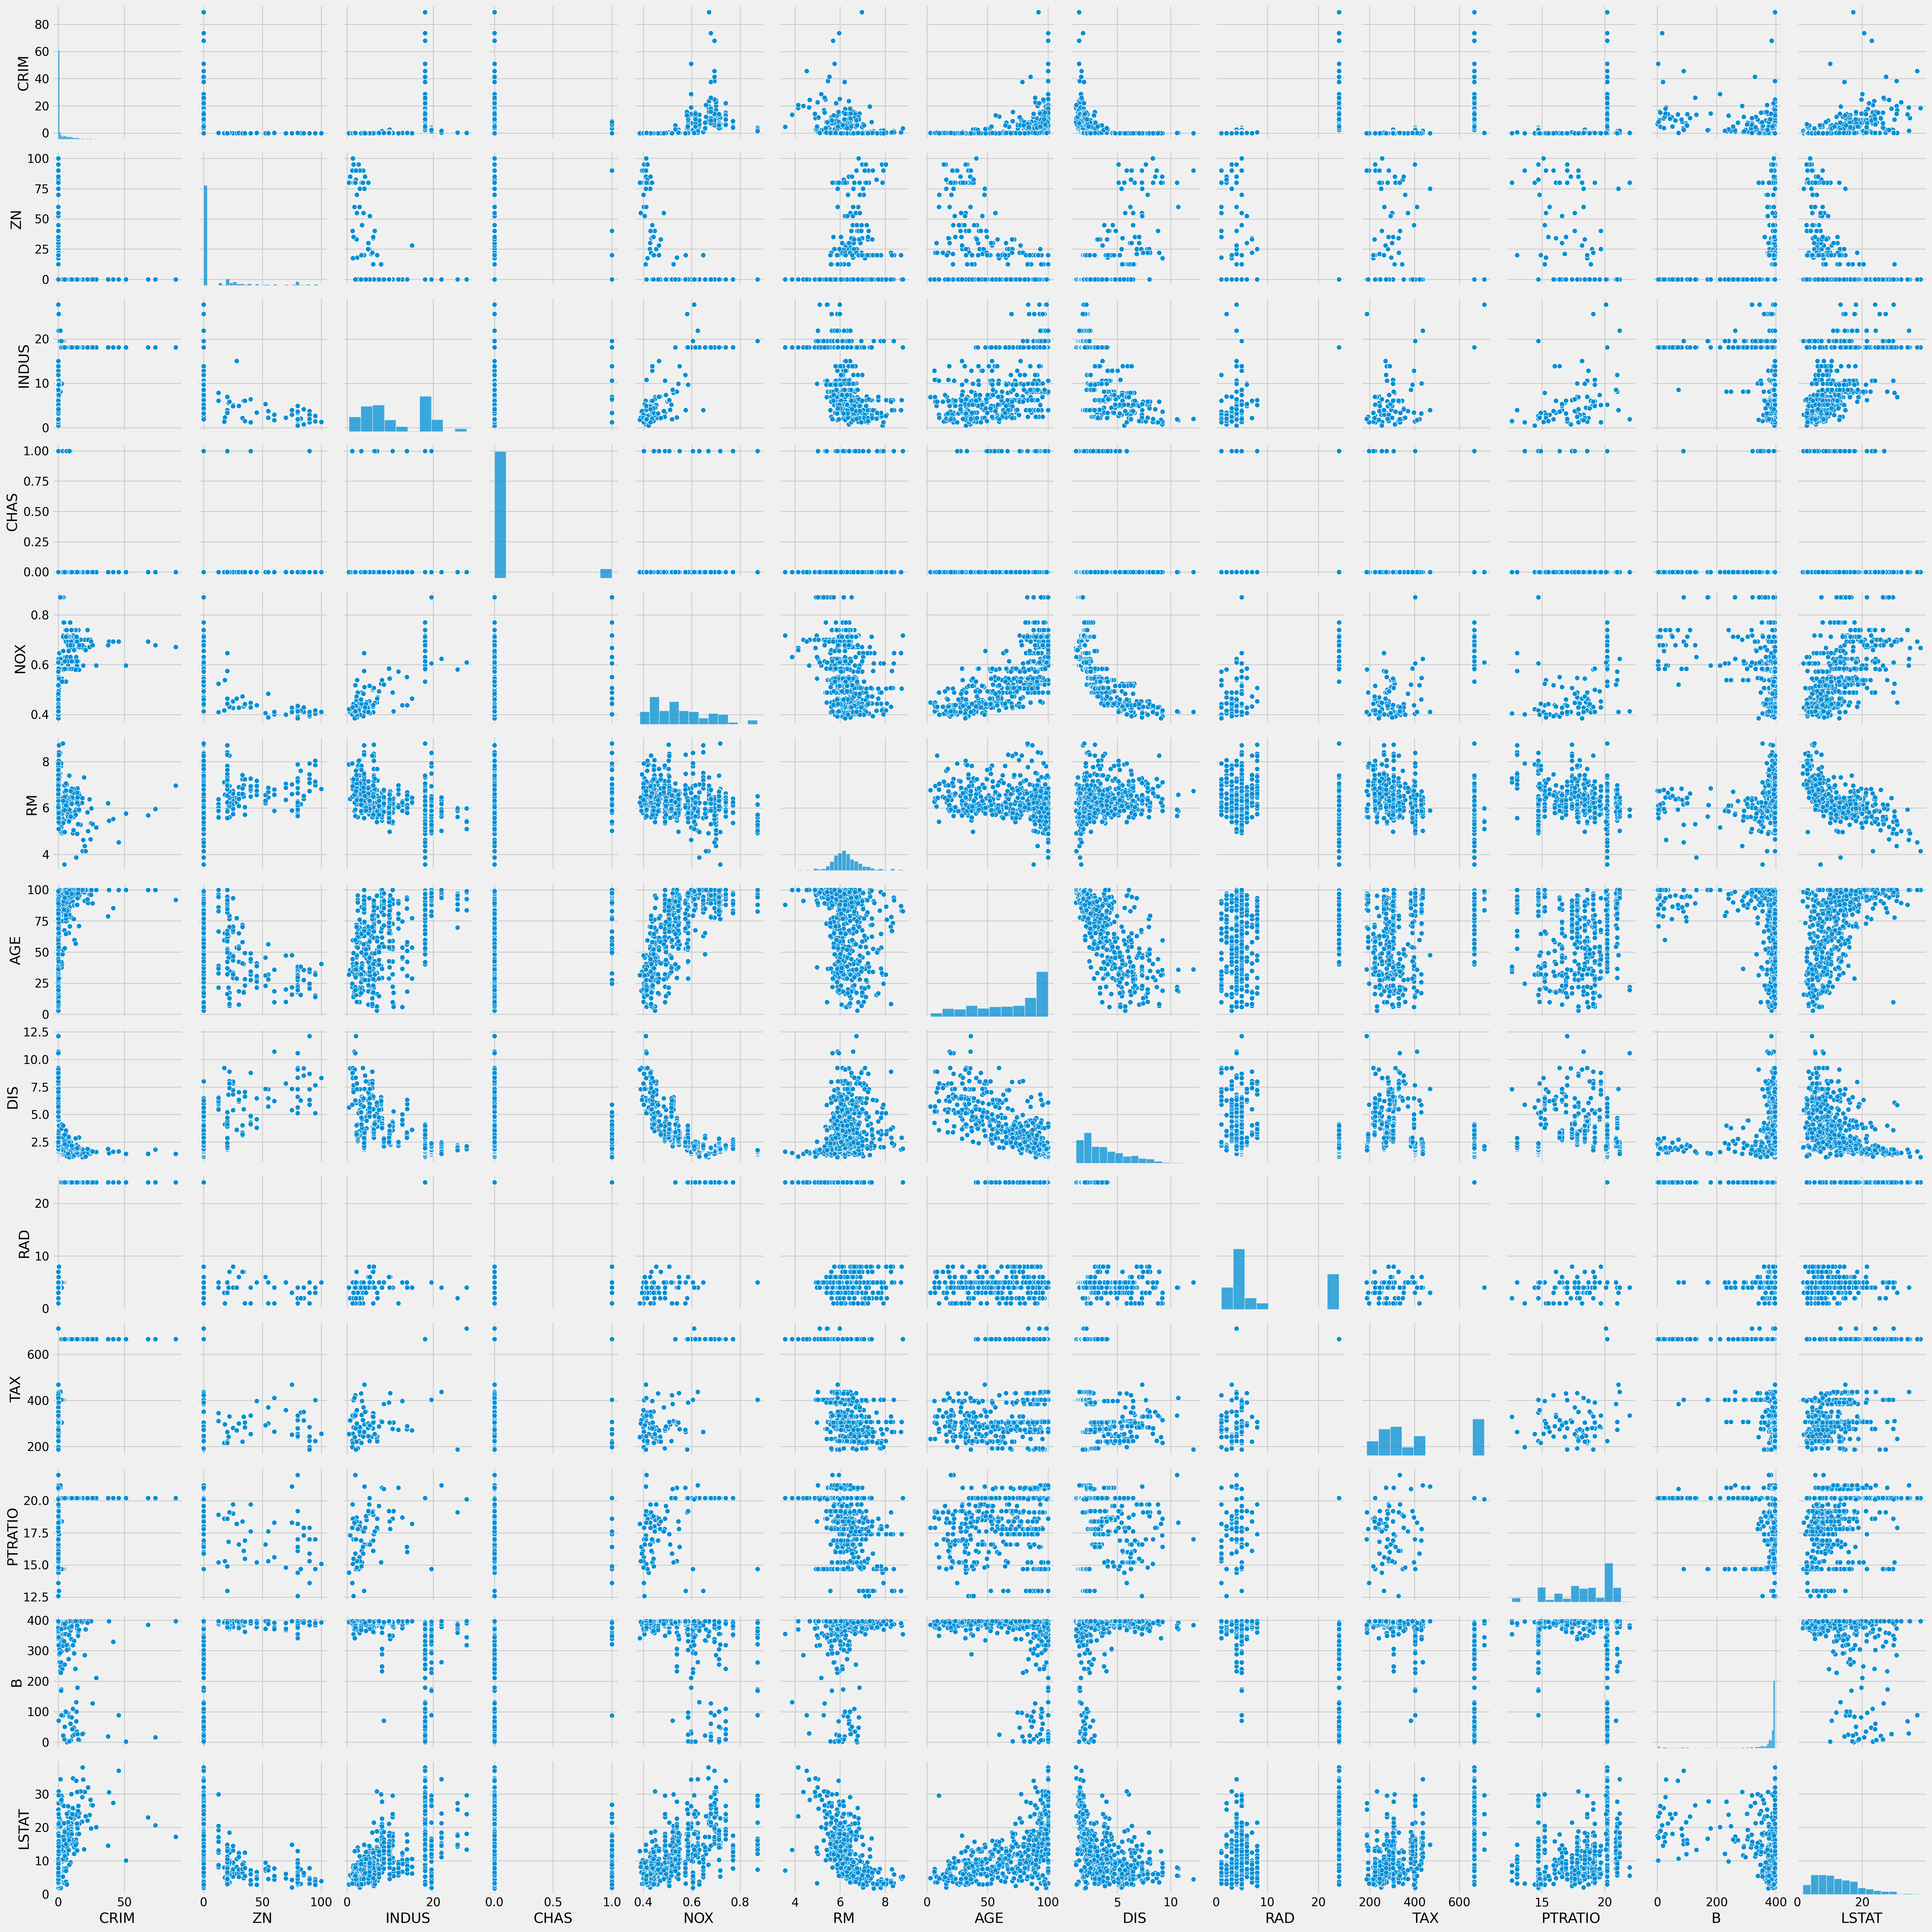

In [28]:
sns.pairplot(X)

In [29]:
import patsy

# A:
df = X.copy(deep=True)

# Add response to core DataFrame
df['MEDV'] = y

In [30]:

y, X = patsy.dmatrices("LSTAT ~ AGE + RM + MEDV", data=df, return_type="dataframe")


y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [31]:
# Build a new model and calculate the score:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print ("R^2 Score: ", metrics.r2_score(y_test, predictions))

R^2 Score:  0.674247277449472
